# 📊 Decision-Driven Customer Churn Analysis



This project focuses on predicting customer churn and translating model insights into
business decisions such as customer retention and revenue protection.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Convert TotalCharges to numeric (it has hidden spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
df['TotalCharges'].isna().sum()

np.int64(11)

In [8]:
# Drop rows where TotalCharges is missing
df = df.dropna(subset=['TotalCharges'])

# Verify shape after drop
df.shape

(7032, 21)

In [9]:
# Encode target variable Churn (Yes → 1, No → 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify target
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [10]:
# Drop customerID (identifier, not useful for ML)
df = df.drop(columns=['customerID'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Check encoded shape
df_encoded.shape

(7032, 31)

In [12]:
# Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Verify
print("X shape:", X.shape)
print("y shape:", y.shape)
print(y.value_counts())

X shape: (7032, 30)
y shape: (7032,)
Churn
0    5163
1    1869
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("\nTrain churn distribution:")
print(y_train.value_counts())

print("\nTest churn distribution:")
print(y_test.value_counts())

X_train: (5625, 30)
X_test: (1407, 30)
y_train: (5625,)
y_test: (1407,)

Train churn distribution:
Churn
0    4130
1    1495
Name: count, dtype: int64

Test churn distribution:
Churn
0    1033
1     374
Name: count, dtype: int64


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify scaling
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (5625, 30)
X_test_scaled shape: (1407, 30)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

# Train model
log_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully")

Logistic Regression model trained successfully


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.7544888888888889
Test Accuracy : 0.7263681592039801

Confusion Matrix (Test Data):
[[724 309]
 [ 76 298]]

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



## ROC–AUC Evaluation

To further evaluate the model’s ability to distinguish between churn and non-churn customers, 
the ROC–AUC metric and ROC curve are used. This provides a threshold-independent measure of 
model performance.

ROC-AUC Score: 0.8349765233911922


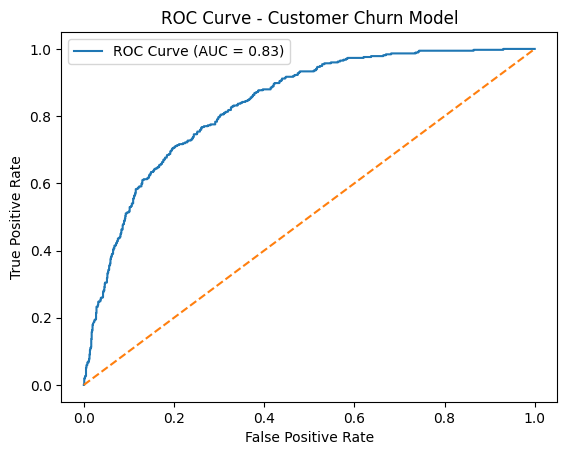

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_test_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC Score:", roc_auc)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Churn Model")
plt.legend()
plt.show()

In [17]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

feature_importance.head(10)

,Feature,Coefficient
10,InternetService_Fiber optic,0.746144
3,TotalCharges,0.623279
21,StreamingTV_Yes,0.259691
23,StreamingMovies_Yes,0.252870
9,MultipleLines_Yes,0.202763
28,PaymentMethod_Electronic check,0.193697
26,PaperlessBilling_Yes,0.124250
0,SeniorCitizen,0.075306
17,DeviceProtection_Yes,0.069476
27,PaymentMethod_Credit card (automatic),0.029226


## Final Business Insights & Conclusion

This project analyzed customer churn using Logistic Regression on telecom customer data.

### Key Findings
- Fiber optic customers showed the highest likelihood of churn
- Customers with higher total charges were more likely to leave
- Streaming service users had higher churn risk
- Senior citizens and customers with dependents were more loyal

### Business Recommendations
- Improve pricing and service quality for fiber optic users
- Introduce loyalty discounts for high-value customers
- Bundle streaming services at competitive rates
- Focus retention strategies on families and senior citizens

### Outcome
This model enables data-driven customer retention strategies and demonstrates how machine learning insights can directly support business decisions.

## Project Status

✅ Data Cleaning & Preprocessing  
✅ Feature Engineering  
✅ Model Training & Evaluation  
✅ Business Insight Extraction  

**Project 3 – Decision-Driven Customer Churn Analysis is COMPLETE.**